In [1]:
import numpy as np
from trackhhl.toy import simple_generator as toy
from trackhhl.hamiltonians import simple_hamiltonian as hamiltonian
import matplotlib.pyplot as plt

In [2]:
N_MODULES = 26
LX = float("+inf")
LY = float("+inf")
Z_SPACING = 1.0

detector = toy.SimpleDetectorGeometry(
    module_id=list(range(N_MODULES)),
    lx=[LX]*N_MODULES,
    ly=[LY]*N_MODULES,
    z=[i+Z_SPACING for i in range(N_MODULES)]
)

generator = toy.SimpleGenerator(
    detector_geometry=detector,
    theta_max=np.pi/6
)

N_PARTICLES = 2
N_EVENTS = 3
SIGMA = (0,0,10)
events = generator.generate_event(N_PARTICLES, N_EVENTS, SIGMA)
event = events[0]


In [3]:
def cartesian_to_spherical_vectorized(cartesian_coords, translation=(0, 0, 0)):
    x, y, z = cartesian_coords[:, 0] - translation[0], cartesian_coords[:, 1] - translation[1], cartesian_coords[:, 2] - translation[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z / r)
    return r, theta, phi

In [4]:
event_hits = []
events_store = []
for event_ in events:
    for hit in event_.hits:
        event_hits.append([hit.x,hit.y,hit.z,hit.track_id])
    events_store.append(event_hits)
structured_array = np.array(events_store)
cartesian_coords = structured_array[:, :, :3]  


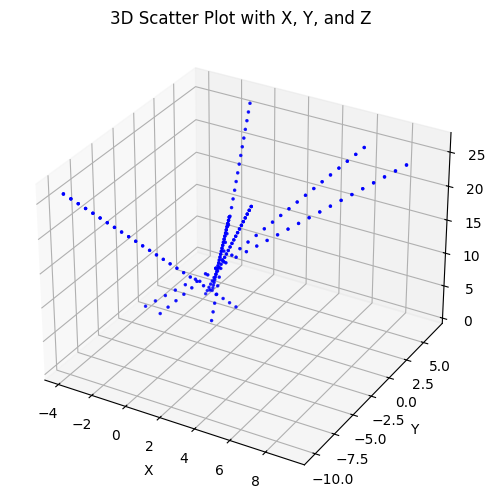

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
for structured_array_ in structured_array:
    ax.scatter(structured_array_[:,0], structured_array_[:,1], structured_array_[:,2], c='b', marker='o', s=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Scatter Plot with X, Y, and Z')
plt.show()

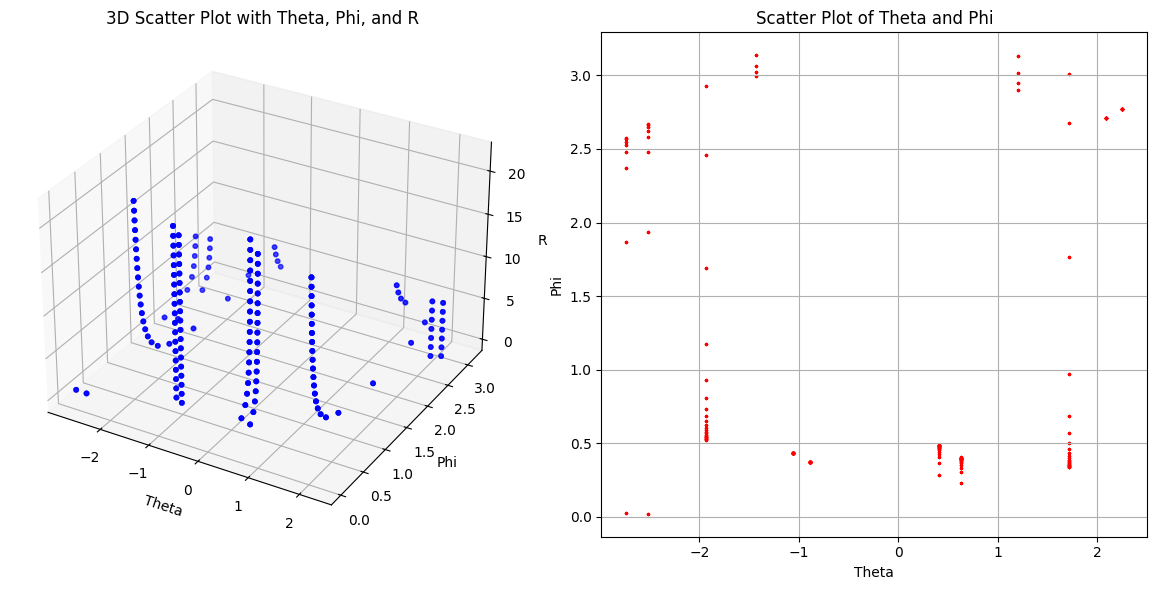

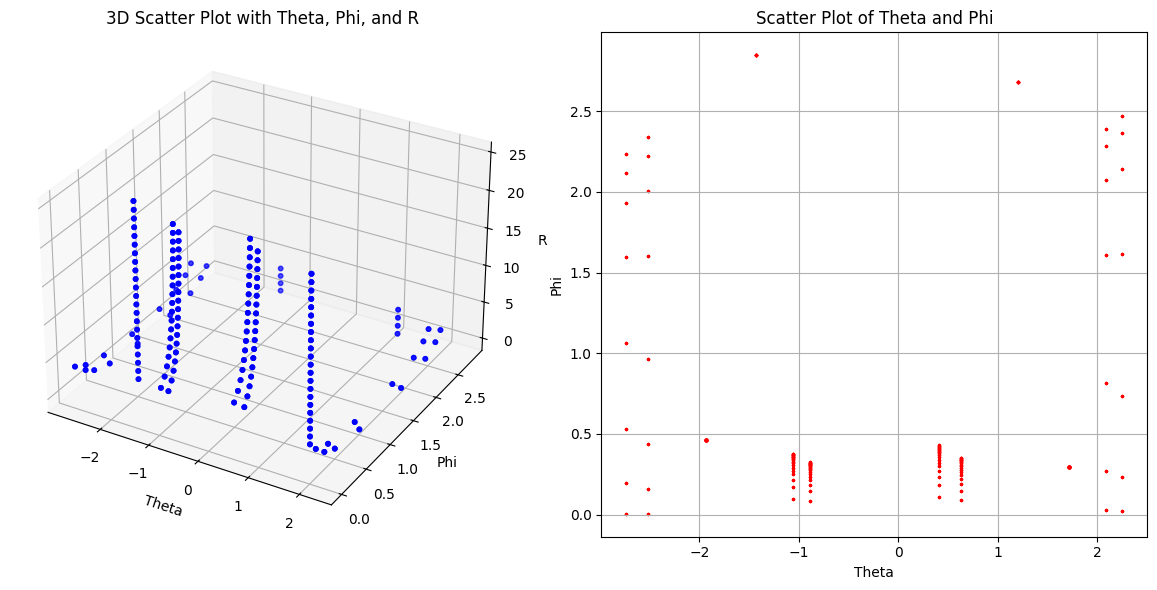

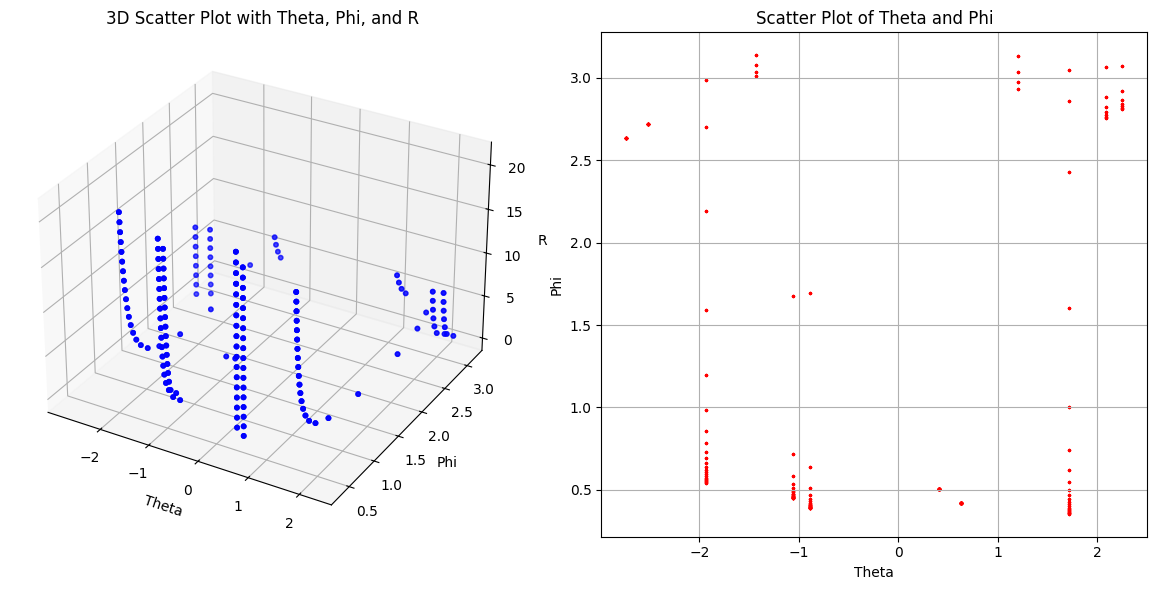

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    for coord in cartesian_coords:
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        r.append(r_)
        theta.append(thetas_)
        phi.append(phi_)

    fig = plt.figure(figsize=(18, 6))

    # Plot the 3D scatter plot with Theta, Phi, and R
    ax1 = fig.add_subplot(131, projection='3d')
    for i in range(len(r)):
        ax1.scatter(theta[i], phi[i], r[i], c='b', marker='o', s=10)  
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.set_zlabel('R')
    ax1.set_title('3D Scatter Plot with Theta, Phi, and R')

    # Create a scatter plot with just Theta and Phi
    ax2 = fig.add_subplot(132)
    for i in range(len(theta)):
        ax2.scatter(theta[i], phi[i], c='r', marker='o', s=2)  
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.set_title('Scatter Plot of Theta and Phi')

    plt.grid()
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()


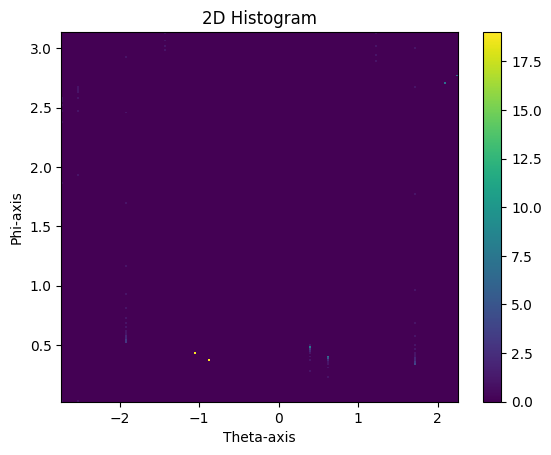

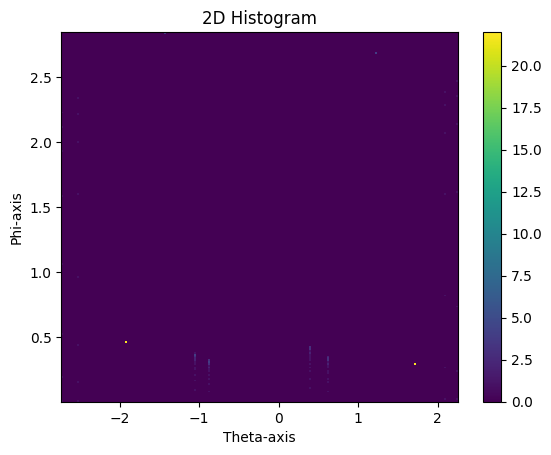

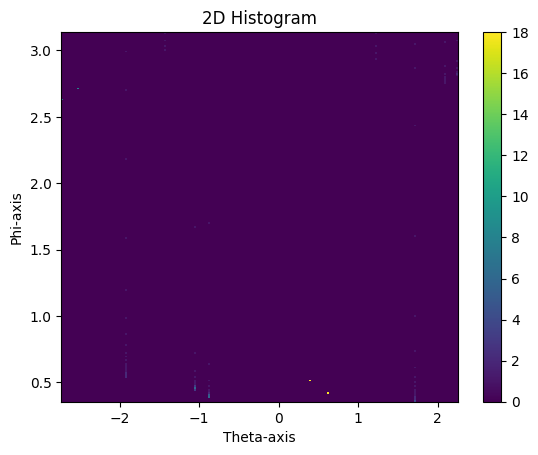

In [7]:
hist = []
theta_axis = []
phi_axis = []
bins = (20, 20)
for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    
    for coord in cartesian_coords:
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        r.append(r_)
        theta.append(thetas_)
        phi.append(phi_)
    for i in range(len(theta)):
        plt.hist2d(theta[i], phi[i], bins=(200, 200), cmap='viridis')
    hist.append(np.histogram2d(theta[0], phi[0], bins=bins)[0])
    theta_axis.append(np.histogram2d(theta[0], phi[0], bins=bins)[1])
    phi_axis.append(np.histogram2d(theta[0], phi[0], bins=bins)[2])
    plt.colorbar()
    plt.xlabel('Theta-axis')
    plt.ylabel('Phi-axis')
    plt.title('2D Histogram')
    plt.show()
hist = np.sum(hist, axis=0)

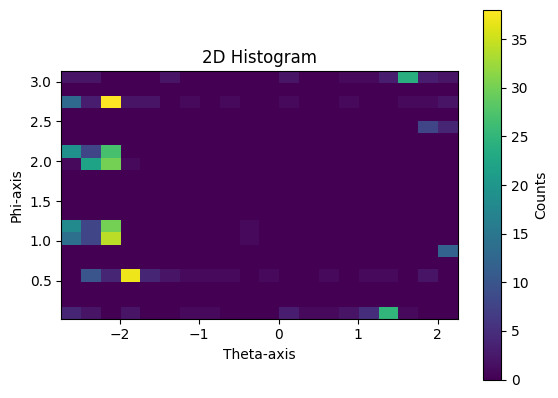

In [8]:


plt.imshow(hist, origin='lower', extent=(theta_axis[0][0], theta_axis[0][-1], phi_axis[0][0], phi_axis[0][-1]), cmap='viridis')
plt.colorbar(label='Counts')

plt.xlabel('Theta-axis')
plt.ylabel('Phi-axis')
plt.title('2D Histogram')
plt.show()

In [9]:
theta_phi = []

for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    
    for coord in cartesian_coords:
        
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        theta.append(thetas_)
        phi.append(phi_)
    
    theta = np.array(theta)
    theta = np.sum(theta, axis=0)
    phi = np.array(phi)
    phi = np.sum(phi, axis=0)

    
    hist, x_edges, y_edges = np.histogram2d(theta, phi, bins=(200, 200))
    
    x_indices, y_indices = np.where(hist > 2)
    
    for x, y in zip(x_indices, y_indices):
        theta_phi.append((x_edges[x] + (x_edges[x + 1] - x_edges[x]) / 2, y_edges[y] + (y_edges[y + 1] - y_edges[y]) / 2))

theta_phi

[(-5.772909513426921, 1.5827182398901765),
 (-5.772909513426921, 1.6294410448346157),
 (-3.153574484560109, 1.3023814102235407),
 (-2.6297074787867465, 1.1154901904457837),
 (1.1870378489906077, 1.3958270201124194),
 (1.1870378489906077, 1.4425498250568587),
 (1.8605811421277867, 1.162212995390223),
 (1.8605811421277867, 1.2089358003346622),
 (5.15345946413178, 1.0220445805569052),
 (5.15345946413178, 1.0687673855013444),
 (6.276031619360413, 8.123910932111677),
 (6.725060481451866, 8.310802151889433),
 (-5.772909513426921, 1.3991596292345223),
 (-4.276146639788742, 8.519824191500717),
 (-3.153574484560109, 1.058049949605004),
 (-3.153574484560109, 1.1006886595586938),
 (-2.6297074787867465, 0.8874951097902447),
 (-2.6297074787867465, 0.9301338197439345),
 (-2.6297074787867465, 0.9727725296976243),
 (1.1870378489906077, 1.2286047894197631),
 (1.1870378489906077, 1.271243499373453),
 (1.8605811421277867, 0.9727725296976243),
 (1.8605811421277867, 1.0154112396513142),
 (3.656696590493601